In [1]:
import pandas as pd
import urllib
pd.set_option('display.max_rows', 10)

In [2]:
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
urllib.request.urlretrieve(file_url, './online_shoppers_intention.csv')

('./online_shoppers_intention.csv', <http.client.HTTPMessage at 0x11f887f28>)

In [3]:
df = pd.read_csv('./online_shoppers_intention.csv')
display(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# 1週目

## (1)

In [4]:
# display('先頭から5行を表示',df[0:5])
display('先頭から5行',df.head(5))
display('データ形式', df.shape)
display('欠損値の数', df.isnull().sum().sum())

'先頭から5行'

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


'データ形式'

(12330, 18)

'欠損値の数'

0

## (2)

In [5]:
df2 = df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']].copy()
display('size df2: ', df2.shape)

'size df2: '

(12330, 5)

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans=KMeans(n_clusters=6, random_state=0)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [8]:
clusters = kmeans.predict(df2)

In [9]:
# df2.loc[:,"clusters"] = clusters

In [10]:
df_clusters = pd.DataFrame(clusters)

In [11]:
df_clusters.columns = ['clusters']
df_clusters

,clusters
0,4
1,4
2,4
3,4
4,4
...,...
12325,0
12326,4
12327,4
12328,4


In [12]:
# df_clusters_size = pd.DataFrame(df_clusters.groupby("clusters").size())
# print(type(df_clusters_size))
# df_clusters_size.reset_index(inplace=True)
# df_clusters_size

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

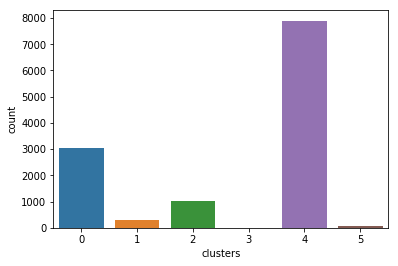

In [14]:
sns.countplot(x='clusters', data=df_clusters)

In [15]:
df_clusters

,clusters
0,4
1,4
2,4
3,4
4,4
...,...
12325,0
12326,4
12327,4
12328,4


In [16]:
cut = pd.cut(df['SpecialDay'], [0, 0.2,0.4, 0.6, 0.8, 1.0], right=False)

In [17]:
df_conc = pd.concat([df_clusters, cut], axis=1)
df_conc

,clusters,SpecialDay
0,4,"[0.0, 0.2)"
1,4,"[0.0, 0.2)"
2,4,"[0.0, 0.2)"
3,4,"[0.0, 0.2)"
4,4,"[0.0, 0.2)"
...,...,...
12325,0,"[0.0, 0.2)"
12326,4,"[0.0, 0.2)"
12327,4,"[0.0, 0.2)"
12328,4,"[0.0, 0.2)"


In [18]:
df_conc.groupby(['clusters','SpecialDay']).size().unstack().fillna(0.0)

SpecialDay  [0.0, 0.2)  [0.2, 0.4)  [0.4, 0.6)  [0.6, 0.8)  [0.8, 1.0)
clusters                                                              
0               2761.0        45.0        52.0        79.0        71.0
1                277.0         2.0         5.0         1.0         6.0
2                944.0        10.0        20.0        16.0        24.0
3                  2.0         0.0         0.0         0.0         0.0
4               7032.0       121.0       166.0       255.0       223.0
5                 63.0         0.0         0.0         0.0         1.0

In [19]:
df_conc.groupby(['clusters','SpecialDay']).size()

clusters  SpecialDay
0         [0.0, 0.2)    2761
          [0.2, 0.4)      45
          [0.4, 0.6)      52
          [0.6, 0.8)      79
          [0.8, 1.0)      71
                        ... 
4         [0.4, 0.6)     166
          [0.6, 0.8)     255
          [0.8, 1.0)     223
5         [0.0, 0.2)      63
          [0.8, 1.0)       1
Length: 23, dtype: int64

In [33]:
cut = pd.cut(df['Region'], [1, 2,3,4,5,6,7,8,9], right=False)

In [37]:
pd_conc = pd.concat([df_clusters, cut], axis=1)

In [43]:
pd_conc.groupby(['clusters','Region']).size().unstack().fillna(0)

Region    [1, 2)  [2, 3)  [3, 4)  [4, 5)  [5, 6)  [6, 7)  [7, 8)  [8, 9)
clusters                                                                
0         1132.0   300.0   595.0   289.0    76.0   195.0   213.0   118.0
1          139.0    25.0    54.0    23.0     8.0    13.0    13.0    10.0
2          399.0   101.0   216.0    95.0    27.0    62.0    58.0    31.0
3            2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0
4         3072.0   706.0  1527.0   771.0   206.0   535.0   473.0   275.0
5           36.0     4.0    11.0     4.0     1.0     0.0     4.0     0.0